In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('post2000s_observations.xlsx', sheet_name='Sheet2')#, dtype={'Report': np.int32, 'Type': str, 'Bookmark quality?': np.int32, 'Repyear': np.int32, 'comments': str}, keep_default_na=False)

In [3]:
df = df.dropna(subset=['Report'])

In [4]:
df['Report'] = df['Report'].astype(np.int32)
df['Repyear'] = df['Repyear'].astype(np.int32)
df

,Report,Type,Repyear,Toc?,Headings?,Bookmark quality?,comments
0,593,Any other report,1961,No,Yes,1,"Scan of body of the report, words look splotch..."
1,41568,Any other report,2002,Yes,Yes,5,"Unusually, “Appendix” is a single heading in t..."
2,41982,Any other report,1996,Yes,Yes,3,"All correct bookmarks are found, but a lot of ..."
4,10189,Well report other,1981,Yes,Yes,2,"Catches about half of headings, also catches s..."
5,102109,Annual report,2017,Yes,Yes,4,"Almost perfect catching of headings, only miss..."
6,43758,Partial relinquishment report,2006,Yes,Yes,3,"Misses 3/6 major headings, 2/9 subheadings. 3 ..."
7,105472,Partial relinquishment report,2018,Yes,Yes,3,"1/5 headings missing, 1 false positive."
8,48907,Any other report,1987,None,None,None,Not textracted
9,15042,Seismic survey final report,1986,Yes,Yes,4,"All headings found, no subheadings found becau..."
10,41275,Any other report,1991,Yes,Yes,4,"Most headings are caught, only a few false pos..."


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([1., 2., 2., 3., 9., 2., 1., 6., 9., 5.]),
 array([1961. , 1966.7, 1972.4, 1978.1, 1983.8, 1989.5, 1995.2, 2000.9,
        2006.6, 2012.3, 2018. ]),
 <a list of 10 Patch objects>)

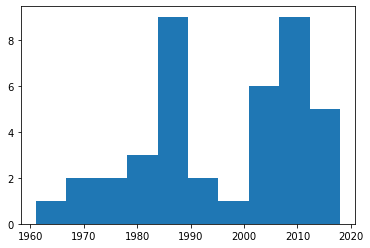

In [6]:
plt.hist(df['Repyear'])

In [7]:
rating_df = df.loc[df['Bookmark quality?'] != 'None']
rating_df['Bookmark quality?'] = rating_df['Bookmark quality?'].astype(np.int32)

C:\Anaconda\envs\gsq\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([ 7.,  0.,  2.,  0.,  0.,  5.,  0.,  9.,  0., 12.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

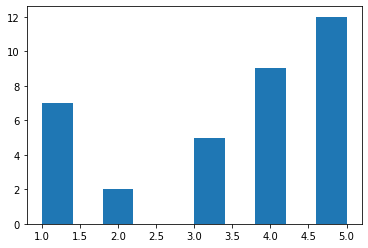

In [8]:
plt.hist(rating_df['Bookmark quality?'])

In [19]:
binary_toc = rating_df['Toc?']
binary_toc = [1 if x=="yes" else 0 for x in binary_toc ]

C:\Anaconda\envs\gsq\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Legend does not support 'has TOC' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


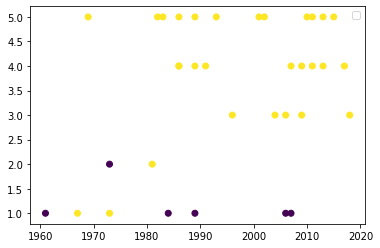

In [24]:
plt.scatter(rating_df['Repyear'].values, rating_df['Bookmark quality?'].values, c=binary_toc, cmap='viridis')

In [14]:
rating_df['Toc?'] = ['yes' if x else 'no' for x in rating_df['Toc?'].str.lower().str.contains('yes') ]

C:\Anaconda\envs\gsq\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
rating_df

,Report,Type,Repyear,Toc?,Headings?,Bookmark quality?,comments
0,593,Any other report,1961,no,Yes,1,"Scan of body of the report, words look splotch..."
1,41568,Any other report,2002,yes,Yes,5,"Unusually, “Appendix” is a single heading in t..."
2,41982,Any other report,1996,yes,Yes,3,"All correct bookmarks are found, but a lot of ..."
4,10189,Well report other,1981,yes,Yes,2,"Catches about half of headings, also catches s..."
5,102109,Annual report,2017,yes,Yes,4,"Almost perfect catching of headings, only miss..."
6,43758,Partial relinquishment report,2006,yes,Yes,3,"Misses 3/6 major headings, 2/9 subheadings. 3 ..."
7,105472,Partial relinquishment report,2018,yes,Yes,3,"1/5 headings missing, 1 false positive."
9,15042,Seismic survey final report,1986,yes,Yes,4,"All headings found, no subheadings found becau..."
10,41275,Any other report,1991,yes,Yes,4,"Most headings are caught, only a few false pos..."
12,4639,Annual report,1973,no,Yes,2,"No TOC, but catches 3 out of 17-19 headings. T..."


(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 11 Text xticklabel objects>)

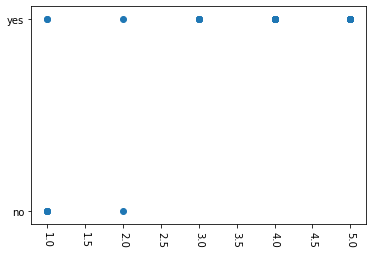

In [110]:
#plt.scatter(rating_df['Type'].values, rating_df['Bookmark quality?'].values)
plt.scatter(rating_df['Bookmark quality?'].values, rating_df['Toc?'].values)

plt.xticks(rotation=270)

In [10]:
nodf = df.loc[df['Toc?'] == 'no']

In [19]:
yesdf = df.loc[df['Toc?'].str.lower().str.contains('yes')]


In [42]:
nodf

,report,type,Toc?,Headings?,Bookmark quality?,bookmark rating,comments
1,62745,Well completion report,no,"Yes, but with no numbering and no TOC they'd b...",activate gsq,1,NaN
2,80420,Well completion report,no,yes,"The bookmarker tries, and get some right, but ...",1,NaN
3,80685,Well completion report,no,"Yes, but it's a welcom so they're lost amongst...",Bad. All noise,1,Recommend treating WELCOMs completely differen...
4,82778,Well completion report,no,"Yes, but it's a welcom",NaN,1,NaN
5,83936,Well completion report,no,NaN,NaN,1,NaN
6,92768,Well completion report,no,Yes but it's a welcom,bad,1,Gross tabular welcom by Australia Pacific LNG


In [41]:
yesdf

,report,type,Toc?,Headings?,Bookmark quality?,bookmark rating,comments
7,31649,Annual report,yes,yes,"Complete, but all except summary are classes a...",5,Change heading id intext num2cyfra1 - to trans...
8,57966,Annual report,yes,yes,"Almost perfect, just one heading marked as sub...",5,NaN
9,77000,Annual report,yes,yes,perfect,5,NaN
10,49708,Annual report,yes,yes,Perfect in terms of catching every real headin...,4,Need to include second line of a marginal as a...
11,76605,Annual report,yes,yes,"Very sparse, only two headings are caught. Cau...",1,NaN
12,91779,Annual report,yes,yes,"Very few headings caught, second line of foote...",1,Reason for low quality not clear except for un...
13,52224,Final or end of tenure report,yes,yes,perfect,5,NaN
15,33906,Partial relinquishment report,yes,yes,As in 31649,5,See 31469
16,47867,Partial relinquishment report,yes,yes,perfect,5,NaN
17,53805,Partial relinquishment report,yes,yes,perfect,5,NaN


In [20]:
df.shape, nodf.shape, yesdf.shape

((28, 7), (7, 7), (21, 7))

In [25]:
import numpy as np

In [32]:
yesdf['bookmark rating'].describe(include=[np.number])

count     20
unique     5
top        5
freq       9
Name: bookmark rating, dtype: int64

In [31]:
yesdf = yesdf.loc[yesdf['bookmark rating'] != 'None']
nodf = nodf.loc[nodf['bookmark rating'] != 'None']

In [34]:
nodf['bookmark rating'].describe()

count     6
unique    1
top       1
freq      6
Name: bookmark rating, dtype: int64

In [38]:
yesdf['bookmark rating'].mean(), yesdf['bookmark rating'].median(), yesdf['bookmark rating'].mode()

(3.55, 4.0, 0    5
 dtype: object)

In [40]:
nodf['bookmark rating'].mean(), nodf['bookmark rating'].median(), nodf['bookmark rating'].mode()

(1.0, 1.0, 0    1
 dtype: object)

In [47]:
df = df.loc[df['bookmark rating']!= 'None']
annual = df.loc[df['type'] == 'Annual report']
partrel = df.loc[df['type'] == 'Partial relinquishment report']
welcom = df.loc[df['type'] == 'Well completion report']
welprop = df.loc[df['type'] == 'Well proposal']

for report in [annual, partrel, welcom, welprop]:
    print(report['bookmark rating'].mean(), report['bookmark rating'].median(), report['bookmark rating'].mode())

3.2857142857142856 4.0 0    5
dtype: object
4.166666666666667 5.0 0    5
dtype: object
1.8888888888888888 1.0 0    1
dtype: object
3.0 3.0 0    2
1    4
dtype: object
